In [1]:
from iertools.tb import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
fecha1 = parse("2023-05-01") 
fecha2 = fecha1 + pd.Timedelta("10D")
tmp= TB(config_file='config_gbv.ini',device_name='a7')

a7 = tmp.get_df(key='s8lp',start_datetime=fecha1,end_datetime=fecha2)


["s8lp","user-agent"]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/iertools/tb.py:120: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  datos = pd.read_json(telemetry.text, orient=None)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/iertools/tb.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform

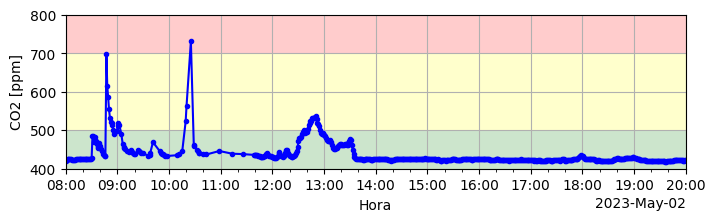

In [7]:
fecha1 = parse("2023-05-02 08:00") 
fecha2 = fecha1 + pd.Timedelta("12h")

fig, ax = plt.subplots(figsize=(8, 2))

# Gráfico de los datos
ax.plot(a7, 'b.-')

# Configuración del eje x para fechas
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Ticks cada 1 hora
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=20))  # Ticks menores cada 20 minutos
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# Agregar bandas de colores
ax.axhspan(400, 500, facecolor='green', alpha=0.2)
ax.axhspan(500, 700, facecolor='yellow', alpha=0.2)
ax.axhspan(700, 800, facecolor='red', alpha=0.2)

# Ajustes del gráfico
ax.grid()
ax.set_ylim(400, 800)
ax.set_xlim(fecha1, fecha2)
ax.set_ylabel('CO2 [ppm]')
ax.set_xlabel('Hora')
# ax.set_title('Concentración de CO2')

plt.show()